# Create fake user data

This notebook generates fake user data with long-tail distributions.

In [233]:
!pip install faker
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [234]:
DATA_DIR="../../data/recommendations/"
ratings_path = 'ml-latest-small/ratings.csv'
users_path = 'ml-latest-small/users.csv'
ratings_df = pd.read_csv(os.path.join(DATA_DIR, ratings_path))

In [235]:
users_df = ratings_df[['userId']].drop_duplicates().reset_index(drop=True)
users_df.head()

,userId
0,1
1,2
2,3
3,4
4,5


In [236]:
# Generate a long-tail probability distribution
probability_distribution = np.random.exponential(scale=1, size=users_df.size)
probability_distribution.sort()
probability_distribution = probability_distribution / probability_distribution.sum()
print("probability_distribution", type(probability_distribution))
print("sum", probability_distribution.sum())
print("mean", probability_distribution.mean())
print("max", probability_distribution.max())
print("min", probability_distribution.min())

probability_distribution <class 'numpy.ndarray'>
sum 1.0
mean 0.001639344262295082
max 0.016419241004288165
min 3.3957975833362805e-06


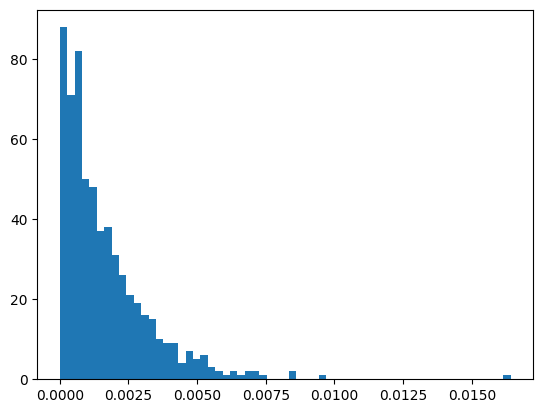

In [237]:
# Plot the data to visualize the skew
plt.hist(probability_distribution, bins=int(users_df.size/10))
plt.show()

In [266]:
from faker import Faker

fake = Faker()
NUM_USERS = users_df['userId'].count()

cities = [fake.unique.city() for _ in range(0, int(users_df.size / 5))]
post_codes = {city: [fake.unique.postcode() for _ in range(0, 11)] for city in cities}
jobs = [fake.unique.job() for _ in range(0, int(users_df.size / 5))]

users_df['city'] = np.random.choice(cities, size=NUM_USERS, p=np.random.shuffle(probability_distribution))
#post codes should be a common pool for each city
users_df['post_code'] = [np.random.choice(post_codes[city]) for city in users_df['city']]
users_df['job'] = np.random.choice(jobs, size=NUM_USERS, p=np.random.shuffle(probability_distribution))
#downloads is loosly associated with the job to get some correlations in the data
users_df['downloads'] = users_df['job'].apply(lambda x: int(np.random.choice(probability_distribution[ord(x[0])-10:ord(x[0])+10]) * 1234567 + ord(x[1]) * 3))
                                  
users_df.sort_values(by=['downloads', 'job'])

,userId,city,post_code,job,downloads
180,181,Russellton,35008,"Scientist, research (maths)",314
305,306,Woodland,48694,"Scientist, water quality",314
263,264,Port Timborough,20287,Advertising copywriter,344
441,442,Kelseymouth,69105,Health service manager,347
453,454,Butlerborough,53207,Tour manager,350
...,...,...,...,...,...
297,298,West Kellyburgh,78594,Musician,5301
442,443,Hooperside,12817,"Surveyor, planning and development",5301
203,204,New Joshua,67877,Rural practice surveyor,5302
315,316,North Amyville,96742,"Surveyor, minerals",5302


In [267]:
users_df.describe()

,userId,downloads
count,610.000000,610.000000
mean,305.500000,2262.183607
std,176.236111,1614.216403
min,1.000000,314.000000
25%,153.250000,983.000000
50%,305.500000,1441.000000
75%,457.750000,3202.500000
max,610.000000,5302.000000
